In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import os 
import inspect

# Put all datasets in 'path-to-repo/data' directory please
path = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe()))) # script directory
path += '/scripts/'

os.chdir(path)
from get_graph import *
data = load_data()
G = get_graph(data)

/afs/inf.ed.ac.uk/user/s13/s1338673/miniconda2/envs/mlp/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


3360


In [2]:
def isnotzero(row):
    return row[1] != 0 



In [3]:
fulldeglist= []
for node in G.nodes():
    fulldeglist.append((G.degree(node),node))
fulldeglist.sort(reverse=True)

deglist = [x[1] for x in fulldeglist if x[0]!=0]

deglist[1]

(u'TI5mg9fDWLjt8G7Wo42U6A', 55.9508754, -3.1914633)

In [4]:
import math
def calcdistance(b1 , b2):
    #print(b1[1])
    lat1 = math.radians(float(b1[1]))
    lon1 = math.radians(float(b1[2]))
    lat2 = math.radians(float(b2[1]))
    lon2 = math.radians(float(b2[2]))
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    R = 6373.0
    a = sin(dlat/ 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

def checkifnotneighbour(n1 , n2):
    for e,a in G.edges(n1):
        if n2 == a:
            return False
        for e,b in G.edges(a):
            if n2 ==b:
                return False
    return True

In [5]:
newgraphlst = []
threshold = 0.6
j=0

for thing in deglist:
    isvalid = True
    #print(j)
    for node in newgraphlst:
        isvalid = isvalid and calcdistance(thing , node) > threshold
    if isvalid:
        newgraphlst.append(thing)
        j+=1
    #if j == cap:
    #    break
    
        

In [6]:
j=0
newgraphlst2 = []
for thing in deglist:
    #if (j%10==0):
    #    print(j)
    isvalid = True
    for node in newgraphlst2:
        if not isvalid:
            break
        isvalid = isvalid and checkifnotneighbour(thing , node)
    if isvalid:
        newgraphlst2.append(thing)
    j+=1

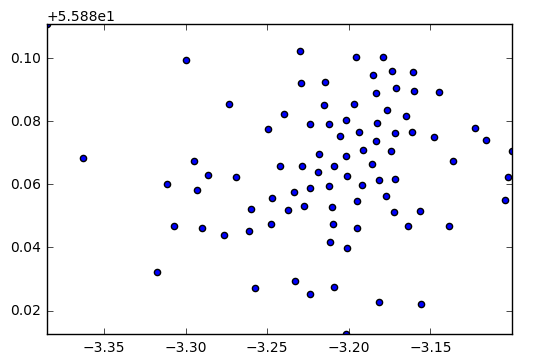

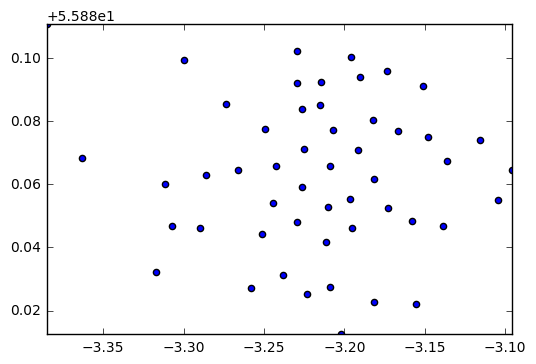

(55.9906704, 55.8924244, -3.09604, -3.3852536)

In [7]:
import numpy as np

vislistx = []
vislisty = []
maxx = -100000
minx = 10000000
maxy = -1000000
miny = 10000000
for thing in newgraphlst:
    vislistx.append(thing[1])
    vislisty.append(thing[2])
    minx = min(thing[1] , minx)
    miny = min(thing[2] , miny)
    maxx = max(thing[1] , maxx)
    maxy = max(thing[2] , maxy)

N = 50
x = np.array(vislistx)
y = np.array(vislisty)
plt.scatter(y, x)
plt.axis([miny,maxy,minx ,maxx])
plt.show()

import numpy as np

vislistx = []
vislisty = []
maxx = -100000
minx = 10000000
maxy = -1000000
miny = 10000000
for thing in newgraphlst2:
    vislistx.append(thing[1])
    vislisty.append(thing[2])
    minx = min(thing[1] , minx)
    miny = min(thing[2] , miny)
    maxx = max(thing[1] , maxx)
    maxy = max(thing[2] , maxy)

N = 50
x = np.array(vislistx)
y = np.array(vislisty)
plt.scatter(y, x)
plt.axis([miny,maxy,minx ,maxx])
plt.show()
maxx, minx, maxy, miny

In [8]:
for node in newgraphlst2:
    deglist.remove(node)

In [9]:
newgraphlst2[0]

(u'guIvTBHp1oxs76q44qQ9Pg', 55.9508754, -3.1914633)

In [39]:
clusters = dict()
for key in newgraphlst2:
    clusters[key] = []
for node in deglist:
    mindist = 10000
    minkey = newgraphlst2[1]
    for key in newgraphlst2:
        d = calcdistance(node,key)
        if d < mindist:
            mindist = d
            minkey = key
    clusters[minkey].append(node)

In [40]:
import pickle

file1 = open(r'clusters.pkl', 'wb')
pickle.dump(clusters, file1)
file1.close()

In [41]:
file2 = open(r'agguserdata.pkl', 'rb')
agguserdata = pickle.load(file2)
file2.close()

In [42]:
checkininfokey = list(agguserdata.index)
checkininfodata =  agguserdata.to_dict(orient='records')
checkininfo = zip(checkininfokey, checkininfodata)

In [130]:
cci = []
bbi = []
ddi = []
clusterci = dict()
localdict = dict()
newkeys = ['total' , 'morningci' , 'noonci' , 'nightci' , 'latenightci' , 'weekci' , 'weekendci']

    

In [213]:
clusterci = dict()
localdict = dict()
ddi=[]
jj=0
for key in clusters.keys():
    for nk in newkeys:
        localdict[nk] = 0
    for node in clusters[key][:-1]:
        if node[0] in checkininfokey: 
            i =  checkininfokey.index(node[0])
            for nk in newkeys:
                localdict[nk] += checkininfodata[i][nk]
        else:
            pass
    #ddi[jj] = localdict
    #ddi.append(localdict.copy())
    #print(localdict)
    #print('-----------------------')
    #jj+=1
    clusterci[key[0]] = localdict.copy()

In [216]:
#clusterci

In [217]:
ids = []
frames= []
for kid, d in clusterci.iteritems():
    ids.append(kid)
    mlist= []
    for k in d.keys():
        mlist.append(d[k])
    frames.append(mlist)

In [218]:
clusterdata_df = pd.DataFrame(data=frames , index= ids , columns=newkeys)

In [219]:
import pickle

file1 = open(r'clusterdata.pkl', 'wb')
pickle.dump(clusterdata_df, file1)
file1.close()

In [ ]:
def highlyconnected(G):
    edges = len(G.edges())
    nodes = len(G.nodes())
    ratio = float(edges)/ float(nodes **2)
    threshold = 0.2
    print(ratio)
    return ratio > threshold

def sepgraphs(G):
    edgestoremove = nx.minimum_edge_cut(G)
    list(edgestoremove)
    G.remove_edges_from(list(edgestoremove))
    GS = list(nx.connected_component_subgraphs(G))
    return GS


a = nx.connected_component_subgraphs(G)

allgraphs = list(a)
#print(len(allgraphs))
for ag in allgraphs:
    if len(ag.nodes()) in range (1000,4000):
        maxsubG = ag
    if len(ag.nodes()) in range (40,50):
        testG = ag
    #print(len(ag.nodes()))
baa = []
B = nx.Graph()
def findclusters(G):
    if len(G.nodes()) <=  3:
        pass
        #baa.append(B)
    elif highlyconnected(G):
        baa.append(G)
    else:
        GS= sepgraphs(G)
        for g in GS[:2]:
            findclusters(g)

In [ ]:
#len(testG.nodes())